### Time_Series_Forecasting

Jay Urbain, PhD

Credits:  
"A Complete Tutorial on Time Series Modeling in R," TAVISH SRIVASTAVA.
https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

- Time Series  
- Loading and Handling Time Series Data   
- Checking Stationarity of a Time Series  
- Making a Time Series Stationary
- Forecasting a Time Series  

#### Summary:  
Determine $f(t)$ where $t$ = time. Given $f(t), t = 0, 1, ...n$, predict the future. To do forecasting, we need the time series to be stationary process. 

#### Introduction

Time series (TS) is a collection of data points collected at constant time intervals. TS is typically analyzed to determine trends for analysis or forecasting.

Time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold.

Along with an increasing or decreasing trend, most TS have some form of seasonality, i.e. variations specific to a particular time frame. For example, if you see the sales of a winter jacket over time, you will likely find higher sales in winter seasons.

Because of the inherent properties of a TS, there are various steps involved in analyzing it.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#### Loading and handling time-series in Pandas

We will be using the AirPassengers data set: https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv

Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class which stores time information and allows us to perform time series indexing efficiently.

In [35]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv('AirPassengers.csv',  index_col='Month',  parse_dates = ['Month'], date_parser = dateparse)
data = pd.read_csv('AirPassengers.csv',  index_col='Month',  parse_dates = ['Month'])
print (type(data))
print (data.dtypes)

<class 'pandas.core.frame.DataFrame'>
#Passengers    int64
dtype: object


In [36]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [37]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [38]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Convert to time series

In [39]:
ts = data["#Passengers"] 
print( type(ts))
ts.head(10)

<class 'pandas.core.series.Series'>


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

#### Indexing time series

In [40]:
# Specific the index as a string constant:
ts['1949-01-01']

112

In [41]:
# use 'datetime' function
ts[datetime(1949,1,1)]

112

In [42]:
# Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [43]:
#Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [44]:
#All rows of 1950:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

#### Checking for stationarity

A TS is said to be stationary if its statistical properties such as mean and variance remain constant over time. 

Most of the TS models work on the assumption that the TS is stationary. Intuitively, if a TS has a particular behavior over time, it is likely that it will follow the same behavior in the future. We're looking for signals that are independent of trend, seasonality, and noise.

Stationarity is defined using a strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, i.e., the following:

* Constant mean
* Constant variance
* An autocovariance that does not depend on time.

Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series. 

#### Stationary Series  
There are three basic criterion for a series to be classified as stationary series:

1. The mean of the series should not be a function of time, it should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

<img src="Mean_nonstationary.webp">

2. The variance of the series should not a be a function of time. This property is known as *homoscedasticity*. The following images shows what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph).

<img src="Var_nonstationary.webp">

3. The covariance of the ith term and the (i + m)th term should not be a function of time (should only depend on the distance between observations). In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.

<img src="Cov_nonstationary.webp">


<b>Autocovariance:</b>  
Given a stochastic process ${\displaystyle X=(X_{t})}$, the autocovariance is a function that gives the covariance of the process with itself at pairs of time points. Where $E$ is the expectation operator. If the process has the mean function ${\displaystyle \mu _{t}=E[X_{t}]}$, then the autocovariance is given by:

$$
{\displaystyle C_{XX}(t,s)={\text{cov}}(X_{t},X_{s}) \
= E[(X_{t}-\mu _{t})(X_{s}-\mu _{s})] }
$$

where $t$ and $s$ are two time periods or moments in time.

#### Why do I care about ‘stationarity’ of a time series?

Unless your time series is stationary, you cannot build a time series model. In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of making TS data stationarity. Some of them are Detrending, Differencing etc.


#### Random Walk  
Random walk is most basic concept for desribing random noise or variation in a time series. Describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

Random walks can be formulated this series:

$X(t) = X(t-1) + Er(t)$ 

where $Er(t)$ is the error at time point $t$. This is the randomness at each point in time.

Now, if we recursively fit in all the $Xs$, we will finally end up to the following equation :

$X(t) = X(0) + Sum(Er(1),Er(2),Er(3).....Er(t))$

#### 1. Is the Mean constant ?

$E[X(t)] = E[X(0)] + Sum(E[Er(1)],E[Er(2)],E[Er(3)].....E[Er(t)])$ 

We know that the expectation of any error will be zero as it is random.

Hence we get $E[X(t)] = E[X(0)]$ = Constant.

2. Is the Variance constant?

$Var[X(t)] = Var[X(0)] + Sum(Var[Er(1)],Var[Er(2)],Var[Er(3)].....Var[Er(t)])$


$Var[X(t)] = t * Var(Error)$ = Time dependent.

Hence, we can infer that the random walk is not a stationary process as it has a time variant variance. 

Also, if we check the covariance, we see that too is dependent on time.

#### Dickey Fuller Test of Stationarity

$X(t) = Rho * X(t-1) + Er(t)$

=>  $X(t) - X(t-1) = (Rho - 1) X(t - 1) + Er(t)$

Test if $(Rho – 1)$ is significantly different than zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series.


The Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

It uses an autoregressive model that optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, i.e., that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the *p-value* from the test. A *p-value* below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a *p-value* above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.  
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

A good first step is a simple plot the data and analyze visually. The data can be plotted using following command:

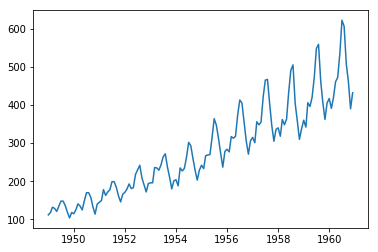

In [45]:
plt.plot(ts)

It is  evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. More formally, we can check stationarity using the following methods:

<b>Plotting Rolling Statistics:</b> We can plot the moving average or moving variance and see if it varies with time. This means that at any instant $t$, we’ll take the average or variance of the last year, i.e. last 12 months. This is more of a visual technique.

<b>Dickey-Fuller Test:</b> This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results consist of a Test Statistic and some Critical Values for different confidence levels. If the ```Test Statistic``` is less than the ```Critical Value```, i.e., within the confidence interval, we can reject the null hypothesis and say that the series is stationary.


#### Function for testing stationarity

In [46]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


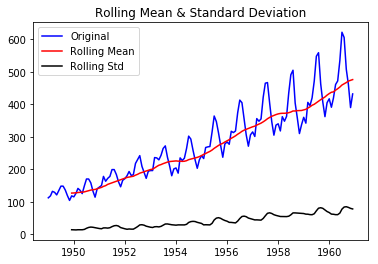

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [47]:
test_stationarity(ts)

Therefore, the time series is not stationary.

There are 2 major reasons behind non-stationaruty of a TS:
1. **Trend** – varying mean over time. For example, in this case we saw that on average, the number of passengers was growing over time.
2. **Seasonality** – variations at specific time-frames. For example, people might have a tendency to buy cars in a particular month because of pay increases or holidays.

The underlying principle is to model or estimate the trend and seasonality in the series and remove them from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

To eliminate the **trend**, we can apply a transformation that makes the values more or less the same by using a log transformation.

#### Making TS Stationary

*Estimating & Eliminating Trend*

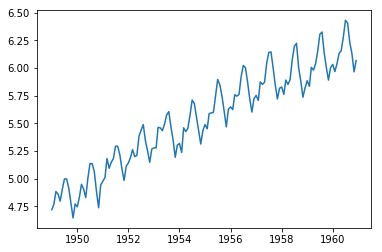

In [48]:
ts_log = np.log(ts)
plt.plot(ts_log)

#### Smoothing: moving average

Deal with the noise by taking rolling mean.

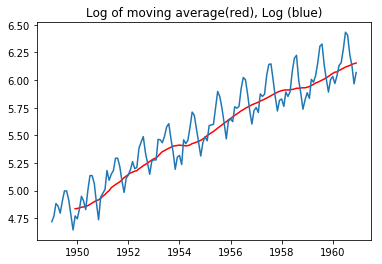

In [49]:
ts_smooth = ts_log.rolling(window = 12).mean()
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.title('Log of moving average(red), Log (blue)')
plt.show()

In [50]:
# Case 1: No subtraction
no_sub_ts = ts_smooth
no_sub_ts.dropna(inplace = True)

# Case 2: Yes subtraction
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)

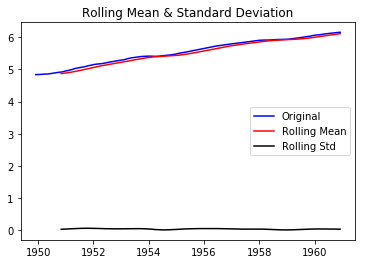

Results of Dickey-Fuller Test:
Test Statistic                  -1.737158
p-value                          0.412076
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


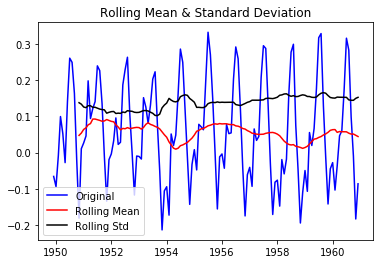

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [51]:
# Perform Dickey-Fuller on both
test_stationarity(no_sub_ts)
test_stationarity(sub_ts)

#### Exponential weighted average instead of rolling average

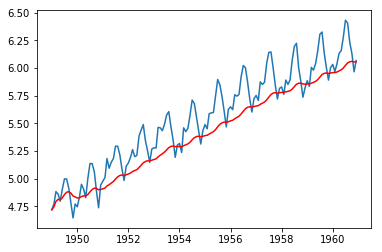

In [52]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

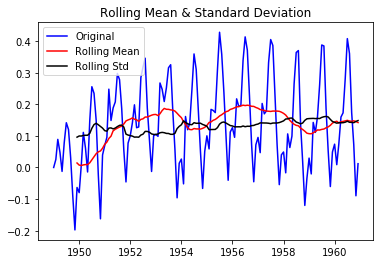

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [53]:
exp_ts_diff = ts_log-expwighted_avg
test_stationarity(exp_ts_diff)

Since test statistic is lower than 1% critical value, it means that we are 99% sure that we have a stationary series.


#### Eliminating Trend and Seasonality

Other ways of eliminating trend and seasonality,
* Differencing
* Decomposition

**Differencing**

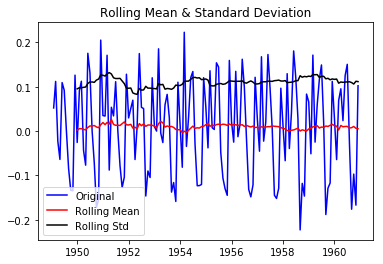

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [54]:
ts_diff = ts_log - ts_log.shift()
ts_diff.dropna(inplace = True)

test_stationarity(ts_diff)

#### Differencing + exponential weighting

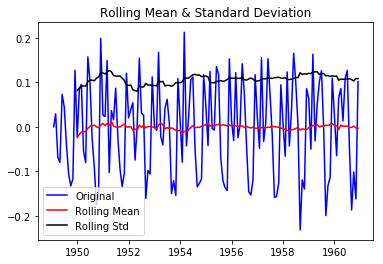

Results of Dickey-Fuller Test:
Test Statistic                  -4.067811
p-value                          0.001094
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [55]:
ts_diff_exp = ts_diff  - ts_diff.ewm(halflife = 12).mean()
ts_diff_exp.dropna(inplace = True)
test_stationarity(ts_diff_exp)

Good results. Confidence >> 99%. 

#### Decomposition 

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

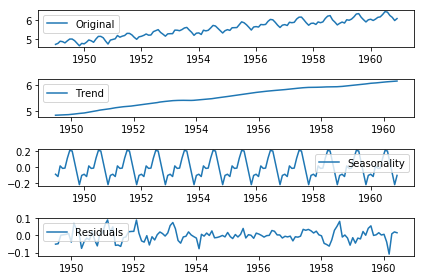

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. We can check stationarity of residuals:

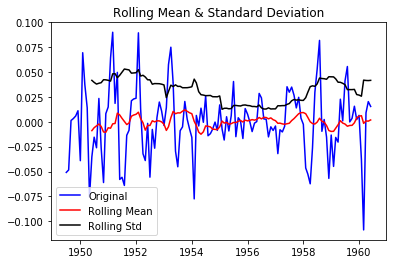

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [57]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. 

You can try advanced decomposition techniques as well which can generate even better results. 

### Forecasting

Modeling the TS after differencing is a very popular technique. Its relatively easy to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations we may want to consider:

1. A strictly stationary series with no dependence among the values. This is the base case where we can model the residuals as white noise. But this is not typically done.   
2. A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

**ARIMA**  Auto-Regressive Integrated Moving Averages 
ARIMA forecasting for a stationary time series is essentially a linear regression for time series. The predictors depend on the parameters (p,d,q) of the ARIMA model:

**1. Number of AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).  
**2. Number of MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at the ith instant and actual value.  
**3. Number of Differences (d):** These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.  

**Selecting p, q, and d values**  
1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).  
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. E.g., at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.  

You can find very good examples of the generated equations ARIMA equations for different values of (p, d, and q) here: https://people.duke.edu/~rnau/411arim.htm 

#### ACF and PACF plots:

In [58]:
from statsmodels.tsa.stattools import acf, pacf

In [59]:
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

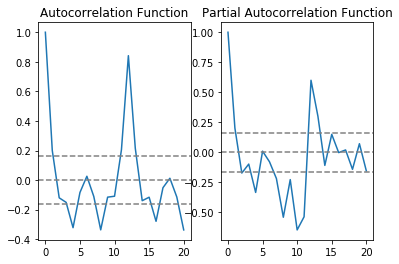

In [60]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. Please note that here RSS is for the values of residuals and not actual series.


In [61]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#### AR model

order (iterable) – The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

Text(0.5, 1.0, 'RSS: 1.5023')

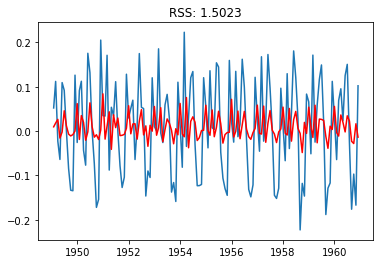

In [62]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

#### MA model

Text(0.5, 1.0, 'RSS: 1.4721')

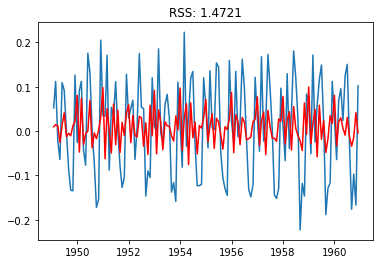

In [63]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

In [64]:
#### ARIMA model

Text(0.5, 1.0, 'RSS: 1.0292')

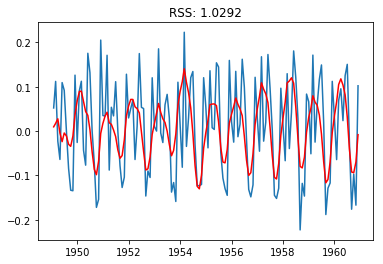

In [65]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

#### Convert data to original scale

In [66]:
preds = pd.Series(results_AR.fittedvalues, copy = True)
preds_cumsum = preds.cumsum()
print (preds_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [67]:
preds_log = pd.Series(ts_log.ix[0], index=ts_log.index)
preds_log = preds_log.add(preds_cumsum,fill_value=0)
preds_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

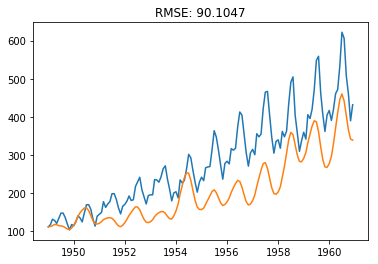

In [68]:
preds_ARIMA = np.exp(preds_log)
plt.plot(ts)
plt.plot(preds_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((preds_ARIMA-ts)**2)/len(ts)))